**PRA-PROSES**

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/SKRIPSI/Data/Data Tambahan/Data yang dilabelling/datalabellingAAC.zip")

In [ ]:
df1

In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291100 entries, 0 to 291099
Columns: 904 entries, cid to label
dtypes: float64(20), int64(883), object(1)
memory usage: 2.0+ GB
None


In [ ]:
df1.dtypes

cid        int64
X1         int64
X2         int64
X3         int64
X4         int64
          ...   
T        float64
W        float64
Y        float64
V        float64
label      int64
Length: 904, dtype: object

In [ ]:
cols = df1.columns[884:903]
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df1.mean()

cid      8.908541e+06
X1       6.170732e-01
X2       5.646341e-01
X3       4.902439e-01
X4       6.121951e-01
             ...     
T        5.253006e-02
W        1.381413e-02
Y        3.263214e-02
V        6.909809e-02
label    1.281003e-02
Length: 903, dtype: float64

In [ ]:
cols = df1.columns[884:903]

In [ ]:
df1[cols]=df1[cols].replace(0,df1[cols].mean())

In [ ]:
df1.to_csv('/content/drive/MyDrive/SKRIPSI/praprosesAAC.csv', index=False)

**undersampling**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SKRIPSI/praprosesfix.csv")

In [ ]:
y=df['label']

In [ ]:
del df['cid']
del df['Nama.Protein']
del df['label']

In [ ]:
# example of combining random oversampling and undersampling for imbalanced data
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution
print(Counter(y))

Counter({0: 287371, 1: 3729})


In [ ]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.2)
# fit and apply the transform
df, y = under.fit_resample(df, y)
# summarize class distribution
print(Counter(y))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 18645, 1: 3729})


In [ ]:
df.fillna(df1.mean(), inplace=True)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(undersampling,y, test_size=0.2,random_state=1234) # 80% training and 20% test

In [ ]:
x_train.to_csv('/content/drive/MyDrive/SKRIPSI/x_train.csv', index=False)
x_test.to_csv('/content/drive/MyDrive/SKRIPSI/x_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/SKRIPSI/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/SKRIPSI/y_test.csv', index=False)

In [ ]:
del undersampling['cid']
del undersampling['Nama.Protein']
del undersampling['label']

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(undersampling, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(undersampling[row_ix, 0], undersampling[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
class_count_0, class_count_1   = df['label'].value_counts()

# Separate class
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (287371, 1284)
class 1: (3729, 1284)


In [ ]:
class_0_under = class_0.sample(10*class_count_1)

undersampling = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",df['label'].value_counts())

total class of 1 and0: 0    287371
1      3729
Name: label, dtype: int64


In [ ]:
class_0_under = class_0.sample(2*class_count_1)
label0 = pd.concat([class_0], axis=0)

In [ ]:
label0

,cid,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,RY,NY,DY,CY,EY,QY,GY,HY,IY,LY,KY,MY,FY,PY,SY,TY,WY,YY,VY,AV,RV,NV,DV,CV,EV,QV,GV,HV,IV,LV,KV,MV,FV,PV,SV,TV,WV,YV,VV,label
0,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0.003222,0.001074,0.005371,0.001074,0.001074,0.001074,0.001074,0.001076,0.002148,0.006445,0.006445,0.002148,0.005371,0.002148,0.003222,0.003222,0.002148,0.004296,0.006445,0.004296,0.003222,0.005371,0.005371,0.001074,0.001074,0.002148,0.006445,0.001074,0.003222,0.007519,0.001074,0.002148,0.008593,0.001074,0.005371,0.007519,0.000632,0.003222,0.009667,0
1,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0.001893,0.002344,0.001563,0.001563,0.000781,0.003125,0.003906,0.001076,0.003125,0.003906,0.002344,0.000781,0.000781,0.000781,0.003125,0.001563,0.000537,0.002344,0.006250,0.003125,0.003906,0.003906,0.003125,0.004687,0.004687,0.001563,0.008594,0.002344,0.002344,0.003906,0.003125,0.001692,0.003906,0.002344,0.008594,0.003125,0.000781,0.003906,0.005469,0
2,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0.001893,0.002331,0.001554,0.001554,0.000777,0.002331,0.003885,0.001076,0.003108,0.003108,0.002331,0.000777,0.000777,0.000777,0.003108,0.001554,0.000537,0.002331,0.006216,0.003108,0.003885,0.003885,0.003108,0.003885,0.005439,0.001554,0.008547,0.002331,0.002331,0.004662,0.003108,0.001692,0.004662,0.002331,0.007770,0.003108,0.000777,0.003885,0.005439,0
3,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0.001893,0.013158,0.008772,0.008772,0.001891,0.001016,0.004386,0.001076,0.004386,0.008772,0.001882,0.000741,0.001279,0.004386,0.004386,0.001776,0.000537,0.000945,0.008772,0.005000,0.008772,0.004386,0.003294,0.013158,0.008772,0.002349,0.013158,0.001377,0.004386,0.004386,0.004386,0.001692,0.004386,0.004343,0.008772,0.004386,0.000632,0.002011,0.008772,0
4,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0.001661,0.003322,0.009967,0.000780,0.001661,0.001661,0.001661,0.001661,0.001661,0.006645,0.001882,0.001661,0.001661,0.001661,0.001661,0.003322,0.000537,0.001661,0.002076,0.003322,0.003298,0.006645,0.003322,0.001508,0.003322,0.002349,0.003322,0.001661,0.003322,0.006965,0.003322,0.003322,0.003322,0.001661,0.003322,0.003322,0.000632,0.003322,0.004983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291095,518740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.001929,0.001929,0.002037,0.000780,0.000964,0.001929,0.000964,0.001929,0.000964,0.001929,0.000964,0.000741,0.001279,0.001658,0.000964,0.001929,0.000537,0.000964,0.002076,0.002893,0.002893,0.002893,0.002893,0.000964,0.002893,0.002893,0.005786,0.000964,0.000964,0.002893,0.004822,0.002893,0.001929,0.003857,0.003857,0.002893,0.000632,0.001929,0.004822,0
291096,518740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.001244,0.002488,0.007463,0.000780,0.001244,0.002488,0.001244,0.001244,0.001244,0.004975,0.001882,0.002488,0.001244,0.002488,0.001244,0.002488,0.000537,0.001244,0.002076,0.003731,0.001244,0.006219,0.004975,0.001508,0.003731,0.002349,0.004975,0.001244,0.006219,0.001244,0.004975,0.002488,0.003731,0.002488,0.003731,0.002488,0.000632,0.002488,0.006219,0
291097,518740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000847,0.000847,0.001693,0.000847,0.002540,0.000847,0.002540,0.001693,0.001446,0.001693,0.001693,0.000741,0.000847,0.003387,0.002304,0.001693,0.000847,0.000945,0.005080,0.0

In [ ]:
undersampling

,cid,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X864,X865,X866,X867,X868,X869,X870,X871,X872,X873,X874,X875,X876,X877,X878,X879,X880,X881,Nama.Protein,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,label
119904,9223,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,FGFR4_HUMAN,0.081886,0.054591,0.027295,0.058313,0.021092,0.065757,0.032258,0.084367,0.024814,0.027295,0.099256,0.045906,0.021092,0.029777,0.069479,0.075682,0.053350,0.013648,0.026055,0.088089,0
185431,176407,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,Q6I8R3_HUMAN,0.039526,0.043478,0.047431,0.023715,0.015810,0.035573,0.059289,0.177866,0.039526,0.035573,0.047431,0.039526,0.047431,0.027668,0.067194,0.059289,0.051383,0.035573,0.051383,0.055336,0
232525,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Q96DH9_HUMAN,0.060150,0.048872,0.043233,0.046992,0.020677,0.052632,0.026316,0.054511,0.030075,0.045113,0.112782,0.063910,0.033835,0.056391,0.050752,0.063910,0.043233,0.013158,0.046992,0.086466,0
180195,13791,1,1,0,1,1,0,0,0,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,NS8A_SARS,0.085973,0.067873,0.058824,0.027149,0.013575,0.031674,0.022624,0.067873,0.013575,0.081448,0.140271,0.027149,0.031674,0.049774,0.022624,0.054299,0.058824,0.031674,0.040724,0.072398,0
129208,33039,1,1,0,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0,...,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,NMD3B_HUMAN,0.048159,0.050992,0.046742,0.050992,0.039660,0.079320,0.041076,0.056657,0.033994,0.055241,0.090652,0.082153,0.039660,0.066572,0.049575,0.046742,0.038244,0.014164,0.024079,0.045326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290970,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,NCAP_SARS2,0.072247,0.036618,0.051746,0.055988,0.032942,0.049060,0.033084,0.059239,0.022621,0.048494,0.095292,0.058674,0.025025,0.046798,0.038739,0.064753,0.069984,0.010886,0.045808,0.082002,1
290972,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,NS7A_SARS2,0.118211,0.038339,0.063898,0.047923,0.012780,0.079872,0.076677,0.067093,0.012780,0.044728,0.095847,0.044728,0.031949,0.028754,0.057508,0.079872,0.035144,0.013814,0.031949,0.031949,1
290974,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,VME1_SARS2,0.068140,0.047882,0.034991,0.044199,0.016575,0.077348,0.034991,0.082873,0.014733,0.051565,0.079190,0.068140,0.025783,0.038674,0.060773,0.064457,0.068140,0.018416,0.046041,0.057090,1
290975,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,VEMP_SARS2,0.077399,0.080495,0.027864,0.051084,0.018576,0.092879,0.032508,0.074303,0.026316,0.038700,0.083591,0.054180,0.021672,0.035604,0.072755,0.103715,0.041796,0.007740,0.020124,0.038700,1


In [ ]:
label0.to_csv('/content/drive/MyDrive/SKRIPSI/label0.csv', index=False)

**SPLIT DATA**

In [ ]:
undersampling = pd.read_csv("/content/drive/MyDrive/SKRIPSI/undersampling.csv")

In [ ]:
y = undersampling['label']

In [ ]:
del undersampling['cid']
del undersampling['Nama.Protein']
del undersampling['label']

In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 6.0MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
from imblearn.over_sampling import SVMSMOTE

In [ ]:
svmsmote = SVMSMOTE(random_state = 101)
X_oversample, y_oversample = svmsmote.fit_resample(undersampling, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_oversample.to_csv('/content/drive/MyDrive/SKRIPSI/x_oversample.csv', index=False)

In [ ]:
y_oversample.to_csv('/content/drive/MyDrive/SKRIPSI/y_oversample.csv', index=False)

AttributeError: ignored

In [ ]:
undersampling

,cid,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X864,X865,X866,X867,X868,X869,X870,X871,X872,X873,X874,X875,X876,X877,X878,X879,X880,X881,Nama.Protein,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,label
119904,9223,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,FGFR4_HUMAN,0.081886,0.054591,0.027295,0.058313,0.021092,0.065757,0.032258,0.084367,0.024814,0.027295,0.099256,0.045906,0.021092,0.029777,0.069479,0.075682,0.053350,0.013648,0.026055,0.088089,0
185431,176407,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,0,Q6I8R3_HUMAN,0.039526,0.043478,0.047431,0.023715,0.015810,0.035573,0.059289,0.177866,0.039526,0.035573,0.047431,0.039526,0.047431,0.027668,0.067194,0.059289,0.051383,0.035573,0.051383,0.055336,0
232525,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Q96DH9_HUMAN,0.060150,0.048872,0.043233,0.046992,0.020677,0.052632,0.026316,0.054511,0.030075,0.045113,0.112782,0.063910,0.033835,0.056391,0.050752,0.063910,0.043233,0.013158,0.046992,0.086466,0
180195,13791,1,1,0,1,1,0,0,0,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,NS8A_SARS,0.085973,0.067873,0.058824,0.027149,0.013575,0.031674,0.022624,0.067873,0.013575,0.081448,0.140271,0.027149,0.031674,0.049774,0.022624,0.054299,0.058824,0.031674,0.040724,0.072398,0
129208,33039,1,1,0,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0,...,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,NMD3B_HUMAN,0.048159,0.050992,0.046742,0.050992,0.039660,0.079320,0.041076,0.056657,0.033994,0.055241,0.090652,0.082153,0.039660,0.066572,0.049575,0.046742,0.038244,0.014164,0.024079,0.045326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290970,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,NCAP_SARS2,0.072247,0.036618,0.051746,0.055988,0.032942,0.049060,0.033084,0.059239,0.022621,0.048494,0.095292,0.058674,0.025025,0.046798,0.038739,0.064753,0.069984,0.010886,0.045808,0.082002,1
290972,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,NS7A_SARS2,0.118211,0.038339,0.063898,0.047923,0.012780,0.079872,0.076677,0.067093,0.012780,0.044728,0.095847,0.044728,0.031949,0.028754,0.057508,0.079872,0.035144,0.013814,0.031949,0.031949,1
290974,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,VME1_SARS2,0.068140,0.047882,0.034991,0.044199,0.016575,0.077348,0.034991,0.082873,0.014733,0.051565,0.079190,0.068140,0.025783,0.038674,0.060773,0.064457,0.068140,0.018416,0.046041,0.057090,1
290975,5497174,1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,VEMP_SARS2,0.077399,0.080495,0.027864,0.051084,0.018576,0.092879,0.032508,0.074303,0.026316,0.038700,0.083591,0.054180,0.021672,0.035604,0.072755,0.103715,0.041796,0.007740,0.020124,0.038700,1


In [ ]:
from sklearn.model_selection import RepeatedKFold

random_state = 12883823
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=random_state)
for train, test in rkf.split(undersampling):
    print('%s %s' % (train, test))

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=109) 

for train_index, test_index in kf.split(x_train):
      print("Train:", train_index, "Validation:",test_index)

Train: [    0     2     3 ... 22371 22372 22373] Validation: [    1     9    13 ... 22358 22362 22368]
Train: [    0     1     2 ... 22370 22371 22372] Validation: [   16    17    19 ... 22361 22366 22373]
Train: [    0     1     2 ... 22370 22371 22373] Validation: [    4    12    18 ... 22360 22365 22372]
Train: [    0     1     3 ... 22371 22372 22373] Validation: [    2     5    11 ... 22363 22364 22370]
Train: [    1     2     4 ... 22370 22372 22373] Validation: [    0     3     6 ... 22367 22369 22371]
Train: [    0     1     2 ... 22370 22371 22372] Validation: [    7    12    20 ... 22354 22362 22373]
Train: [    0     1     6 ... 22370 22371 22373] Validation: [    2     3     4 ... 22356 22369 22372]
Train: [    0     1     2 ... 22371 22372 22373] Validation: [    6     8     9 ... 22337 22340 22368]
Train: [    2     3     4 ... 22371 22372 22373] Validation: [    0     1    11 ... 22365 22366 22370]
Train: [    0     1     2 ... 22370 22372 22373] Validation: [   13    19

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
#Import svm model
from sklearn import svm
svm_class = svm.SVC()

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm_class, undersampling, y, scoring='accuracy', cv = cv))

[0.84670391 0.84513966 0.84111732 0.83620112 0.84890478]


In [ ]:
accuracy = cross_val_score(svm_class, undersampling, y, scoring='accuracy', cv = cv).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

In [ ]:
class_count_0, class_count_1   = undersampling['label'].value_counts()

# Separate class
class_0 = undersampling[undersampling['label'] == 0]
class_1 = undersampling[undersampling['label'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (18645, 1284)
class 1: (3729, 1284)


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(undersampling, y, test_size=0.2,random_state=1234)

In [ ]:
train = pd.concat([x_train, class_1], axis=0)

In [ ]:
x_test 

,cid,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X864,X865,X866,X867,X868,X869,X870,X871,X872,X873,X874,X875,X876,X877,X878,X879,X880,X881,Nama.Protein,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,label
218276,73303,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NS7A_SARS2,0.118211,0.038339,0.063898,0.047923,0.012780,0.079872,0.076677,0.067093,0.012780,0.044728,0.095847,0.044728,0.031949,0.028754,0.057508,0.079872,0.035144,0.013814,0.031949,0.031949,0
168047,446541,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,VEMP_SARS2,0.077399,0.080495,0.027864,0.051084,0.018576,0.092879,0.032508,0.074303,0.026316,0.038700,0.083591,0.054180,0.021672,0.035604,0.072755,0.103715,0.041796,0.007740,0.020124,0.038700,1
219984,3220,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,NCAP_SARS,0.074380,0.041322,0.016529,0.016529,0.049587,0.066116,0.041322,0.033058,0.024793,0.066116,0.123967,0.057851,0.008264,0.082645,0.049587,0.057851,0.082645,0.013814,0.041322,0.066116,1
85748,193962,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,...,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,ACVR1_HUMAN,0.043222,0.051081,0.045187,0.056974,0.041257,0.051081,0.045187,0.068762,0.023576,0.053045,0.104126,0.056974,0.027505,0.033399,0.045187,0.070727,0.058939,0.017682,0.027505,0.078585,0
991,5727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ACE2_HUMAN,0.063354,0.038509,0.067081,0.053416,0.009938,0.069565,0.047205,0.053416,0.019876,0.049689,0.094410,0.058385,0.033540,0.048447,0.045963,0.067081,0.048447,0.028571,0.040994,0.062112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219990,3220,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,NCAP_SARS2,0.072247,0.036618,0.051746,0.055988,0.032942,0.049060,0.033084,0.059239,0.022621,0.048494,0.095292,0.058674,0.025025,0.046798,0.038739,0.064753,0.069984,0.010886,0.045808,0.082002,1
143548,151075,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,1,1,0,...,0,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,1,MK14_HUMAN,0.068376,0.048433,0.039886,0.054131,0.005698,0.076923,0.034188,0.062678,0.022792,0.056980,0.091168,0.096866,0.019943,0.068376,0.037037,0.045584,0.048433,0.017094,0.045584,0.059829,0
265954,3034034,1,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,Q53XJ5_HUMAN,0.042254,0.063380,0.007042,0.035211,0.021127,0.077465,0.035211,0.119718,0.021127,0.049296,0.119718,0.084507,0.021127,0.035211,0.049296,0.056338,0.056338,0.014085,0.014085,0.077465,0
239126,6106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,Q4R0Z7_HUMAN,0.052632,0.042105,0.028070,0.045614,0.038596,0.056140,0.021053,0.049123,0.035088,0.045614,0.129825,0.049123,0.031579,0.066667,0.052632,0.073684,0.049123,0.017544,0.038596,0.077193,0


In [ ]:
y_test

218276    0
168047    1
219984    1
85748     0
991       1
         ..
219990    1
143548    0
265954    0
239126    0
246038    0
Name: label, Length: 4475, dtype: int64

In [ ]:
undersampling['label'].value_counts()

0    18645
1     3729
Name: label, dtype: int64

In [ ]:
x_test

,cid,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,RY,NY,DY,CY,EY,QY,GY,HY,IY,LY,KY,MY,FY,PY,SY,TY,WY,YY,VY,AV,RV,NV,DV,CV,EV,QV,GV,HV,IV,LV,KV,MV,FV,PV,SV,TV,WV,YV,VV,label
17980,313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.001893,0.001378,0.002037,0.000780,0.007092,0.001016,0.001927,0.001076,0.001446,0.003287,0.007092,0.000741,0.001279,0.001658,0.002304,0.007092,0.000537,0.000945,0.002076,0.014184,0.007092,0.007092,0.003294,0.001508,0.003933,0.007092,0.003763,0.007092,0.003730,0.007092,0.014184,0.007092,0.002946,0.007092,0.007092,0.007092,0.000632,0.002011,0.006543,0
919,135398513,1,1,1,1,0,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,1,0,1,1,0,1,1,0,1,0,...,0.001876,0.001378,0.001876,0.000780,0.001891,0.001876,0.001876,0.001076,0.001446,0.003752,0.001876,0.000741,0.001279,0.001876,0.005629,0.001876,0.001876,0.000945,0.003752,0.009381,0.003752,0.001876,0.003752,0.001876,0.005629,0.001876,0.005629,0.001876,0.001876,0.005629,0.001876,0.005629,0.003752,0.003752,0.005629,0.005629,0.001876,0.002011,0.011257,0
12211,6326983,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.001838,0.001838,0.002757,0.000919,0.001838,0.002757,0.001838,0.000919,0.003676,0.002757,0.000919,0.000741,0.002757,0.002757,0.005515,0.002757,0.000537,0.000919,0.003676,0.006434,0.003676,0.002757,0.003676,0.000919,0.009191,0.001838,0.001838,0.001377,0.007353,0.010110,0.005515,0.001838,0.002757,0.003676,0.000919,0.008272,0.000632,0.004596,0.006434,0
22086,445154,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,...,0.004367,0.001378,0.002037,0.000780,0.002183,0.002183,0.001927,0.001076,0.001446,0.003287,0.001882,0.000741,0.001279,0.001658,0.002183,0.001776,0.000537,0.000945,0.002076,0.004367,0.006550,0.002522,0.003294,0.001508,0.004367,0.002183,0.006550,0.002183,0.003730,0.006550,0.003648,0.001692,0.002946,0.006550,0.004367,0.010917,0.000632,0.002011,0.002183,1
2162,16678941,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,...,0.003883,0.001378,0.002037,0.001942,0.001891,0.001016,0.001927,0.001942,0.001942,0.001942,0.001882,0.001942,0.001942,0.003883,0.002304,0.001776,0.000537,0.000945,0.002076,0.005000,0.001942,0.001942,0.001942,0.001942,0.001942,0.003883,0.001942,0.005825,0.001942,0.011650,0.001942,0.001692,0.003883,0.003883,0.007767,0.005825,0.001942,0.002011,0.003883,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,4939,1,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,...,0.002528,0.005057,0.001264,0.001264,0.001264,0.001264,0.001927,0.001076,0.006321,0.006321,0.001264,0.002528,0.001264,0.003793,0.005057,0.003793,0.001264,0.003793,0.001264,0.003793,0.007585,0.001264,0.001264,0.001508,0.003793,0.002349,0.003793,0.001264,0.003793,0.001264,0.008850,0.002528,0.001264,0.002528,0.001264,0.003793,0.000632,0.002528,0.003793,0
254,3083544,0,0,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,...,0.001893,0.003690,0.003690,0.000780,0.003690,0.001845,0.005535,0.005535,0.001845,0.005535,0.003690,0.000741,0.001279,0.001845,0.001845,0.001776,0.001845,0.001845,0.002076,0.003690,0.001845,0.001845,0.001845,0.001508,0.005535,0.001845,0.003690,0.001377,0.001845,0.012915,0.001845,0.001845,0.001845,0.001845,0.003690,0.005535,0.000632,0.001845,0.003690,0
19635,40692,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,...,0.001555,0.002687,0.003818,0.001697,0.002262,0.001131,0.002828,0.000707,0.000848,0.003676,0.002404,0.001414,0.002969,0.001131,0.003394,0.002545,0.000283,0.002404,0.004

In [ ]:
x_test.to_csv('/content/drive/MyDrive/SKRIPSI/x_testAAC.csv', index=False)

In [ ]:
x_train.to_csv('/content/drive/MyDrive/SKRIPSI/x_trainAAC.csv', index=False)

FEATURE SELECTION

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=800)
fit = test.fit(x_test, y_test)
fit.scores_

array([9.25945402e-02, 2.81261043e-01, 2.42455564e-01, ...,
       1.71579789e-04, 1.11453953e-01, 1.15918243e-03])

In [ ]:
x_new=test.fit_transform(x_test, y_test)

**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=447)
principalComponents_test = pca_test.fit_transform(x_train)
train_pca = pd.DataFrame(principalComponents_test)

In [ ]:
train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446
0,-1.159832,5.961591,-0.622401,0.897257,3.436927,4.357939,-0.024193,-1.183736,0.318393,0.614557,1.187296,1.858484,0.995642,0.364995,-0.641191,2.735833,-0.811201,-1.027786,2.510554,2.670702,0.514076,1.486922,-0.628476,-0.173949,-1.091926,1.106601,0.779975,1.070975,-1.051898,0.314768,-0.109267,0.766898,0.113294,-0.354755,-0.625793,-1.733639,-0.182241,-0.304565,-0.364116,0.570684,...,0.343746,0.172277,0.298237,0.216375,-0.192385,0.004917,-0.063287,0.118923,0.135253,0.086599,-0.101804,0.120005,-0.023375,0.132869,0.046516,0.143301,0.108211,0.069871,-0.137047,-0.010688,0.277407,0.043062,0.247774,-0.093968,-0.122862,0.104148,-0.169375,0.078545,-0.107834,0.052854,0.015772,0.296543,0.237080,0.105694,0.065716,0.080382,0.016419,-0.164775,-0.013238,-0.011168
1,0.219425,5.120155,1.508674,5.369232,5.124063,5.958696,-0.129916,-1.344376,1.361617,2.068798,0.276182,0.223594,0.703997,-1.049129,-0.037268,-0.684312,-1.000947,0.259313,-0.283267,-2.165093,-0.405486,-1.113090,0.561777,-2.552761,1.123410,-0.093997,-0.580653,-1.005664,0.710397,-0.272262,0.848026,0.613372,-1.017476,0.174307,0.202536,0.059017,0.795319,-1.128265,1.829155,-0.296897,...,0.078516,0.411205,0.152580,-0.019333,-0.102838,0.049911,0.128871,-0.179831,-0.158114,-0.150100,-0.164931,-0.201371,-0.003870,-0.401808,0.303261,-0.048554,-0.004593,-0.053559,-0.462651,0.027263,0.121741,0.072929,0.091252,-0.132239,-0.346815,0.516282,-0.097730,0.386256,0.062345,-0.224081,0.176014,-0.027636,-0.069706,-0.142248,0.045735,-0.287652,-0.036050,-0.175425,0.111655,-0.221710
2,1.987880,7.975453,-1.700487,-5.674388,-1.640583,-2.460595,0.431910,-0.004478,0.552080,0.320318,0.427681,0.164722,-0.093064,0.029355,-0.329543,0.549108,-0.511102,-0.029167,-0.564088,-0.586544,-0.767389,0.129825,-0.888561,0.411301,-0.069149,-0.955932,-0.501659,-1.308165,0.907924,-0.768577,0.485871,-0.164674,0.575215,-0.333782,-0.264874,0.976194,-0.534843,-0.214256,0.149614,-0.756503,...,0.286171,-0.063332,-0.147611,0.114275,-0.298809,-0.146161,-0.175822,-0.270508,0.259535,0.378156,0.008120,-0.180037,0.144966,-0.165206,0.253620,-0.164050,0.093373,0.023440,0.340970,0.008994,0.020195,-0.201725,0.156202,-0.132166,-0.071508,0.060230,0.193549,0.238156,-0.062886,-0.065999,0.140124,-0.243211,0.061673,-0.001815,-0.039127,0.026510,-0.339384,0.021377,0.058088,0.056490
3,-2.436057,-2.051511,0.133060,-0.524717,-3.314779,3.508896,8.903900,3.923897,1.305479,2.513940,-2.771924,-0.396491,2.055983,-0.030006,0.268717,1.026233,0.420039,2.624903,0.545728,-0.070007,-0.192889,0.086830,-1.448821,-0.757373,-0.868700,-0.061260,-1.046404,1.054984,-0.224030,-1.007704,-0.137596,-0.141348,-0.018805,-0.594778,0.139422,-0.264270,-0.734730,-0.049691,0.262672,-0.093131,...,-0.033876,-0.100339,0.025561,-0.118521,-0.147799,-0.014364,-0.022837,-0.131426,0.102000,0.144319,-0.029165,0.084740,-0.000263,-0.048881,0.086065,-0.061088,0.031230,-0.149019,0.115771,0.030356,0.088159,-0.062234,0.128384,-0.026266,0.055940,0.005232,-0.151659,0.083913,-0.139041,-0.099729,-0.027607,0.341668,-0.130491,-0.118505,-0.023608,0.027907,-0.075423,0.055366,0.077243,-0.027122
4,-0.989623,4.964785,1.642894,4.826654,4.617156,5.989735,-0.082398,-1.404132,1.578379,2.205888,-0.050813,-0.373030,0.327858,-0.722185,0.033132,-0.572734,-1.136477,0.583932,0.093267,-2.472198,-0.969534,-1.187460,0.486937,-2.913181,0.425583,-0.373575,-0.377709,-1.629803,0.645983,-0.392206,0.821489,0.543737,-1.200791,-0.063025,0.602892,0.112207,0.515752,-1.111777,2.578487,-0.505186,...,0.084353,-0.303342,0.120732,-0.236982,-0.024267,-0.031944,0.145682,-0.256917,-0.155459,-0.099677,0.181913,-0.067251,-0.007206,0.115429,-0.145223,-0.153322,0.212721,-0.134827,0.162130,0.192448,-0.145775,-0.044501,-0.139648,-0.155572,0.049458,-0.127557,0.123840,-0.232407,-0.

In [ ]:
test_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446
0,15.898421,-0.727925,1.372339,-0.114340,-0.281076,0.701206,0.198066,0.023760,-1.185084,-0.353204,-0.336400,1.116496,-0.423767,-0.145599,0.503699,-0.371041,-0.341065,0.239048,-0.325583,-0.429159,-0.156549,-0.080949,-0.207017,0.064016,0.034704,0.049287,-0.071726,0.122776,0.156707,0.092199,-0.105637,-0.149864,-0.102146,-0.031429,-0.050938,0.186039,0.147496,-0.127959,0.171138,-0.184752,...,0.011520,0.009168,0.046109,0.043633,0.009807,-0.003342,0.050969,0.016841,-0.037030,0.052576,0.066324,-0.015749,0.048011,-0.024712,-0.034801,-0.055364,-0.059663,-0.004024,-0.014022,-0.039644,-0.079162,0.056390,0.000899,0.044174,0.001498,0.043065,-0.057456,-0.006768,0.043979,0.002976,0.043927,-0.044861,-0.030102,0.047078,-0.011440,0.006958,-0.010547,0.048209,0.018262,0.001968
1,-3.106139,-0.949400,4.798169,-3.368571,-0.459226,-1.960097,0.072837,6.776085,-0.261667,6.465881,-0.779079,-0.659230,0.504099,-0.973515,1.227650,0.742466,0.555295,-0.215370,-0.549931,1.852496,-0.129615,0.494267,-0.276906,-0.209325,-0.020222,-1.022709,-1.535764,0.019461,0.434040,-1.676564,-1.958698,1.240009,-0.562999,-0.492191,0.723814,-1.165099,-1.597254,1.273282,0.097394,-0.033051,...,-0.148932,-0.010753,-0.016752,-0.056979,0.057407,0.013319,-0.012062,-0.190778,0.247263,0.104584,-0.132163,0.020935,-0.086655,-0.053228,-0.192445,0.011697,-0.039206,-0.075555,-0.076056,-0.087522,-0.054937,-0.100021,0.023253,-0.109334,0.018742,-0.036054,0.071285,-0.094881,0.001287,0.005160,-0.200320,0.161388,0.044776,0.071541,0.162301,0.045909,-0.141482,0.016326,-0.021200,-0.119551
2,14.172240,0.189549,0.651446,1.106830,-0.605384,-0.394371,0.016431,-0.405632,-1.118215,-0.724670,0.123911,-2.450599,1.163538,-0.305349,-0.722259,0.009232,-0.006387,0.439429,0.197503,-0.137131,0.587135,0.039488,-0.237142,0.128957,0.262679,0.623763,-0.351133,-0.478353,-0.068302,0.041879,-0.395188,-0.383024,-0.579144,0.164665,-0.068530,-0.104490,-0.119401,0.083350,0.254779,0.188316,...,0.102573,-0.363577,-0.199177,-0.350517,0.375676,0.361286,0.177733,-0.013875,-0.226559,0.109355,0.192550,0.119307,0.178610,0.033189,0.054398,-0.380189,-0.164678,-0.284403,0.052995,-0.128242,0.117353,0.126739,0.532364,0.297403,0.062252,-0.028468,-0.073813,0.082267,-0.153127,0.300676,-0.261284,0.147752,0.208723,-0.336401,-0.180298,0.222183,0.107798,0.236180,0.455222,-0.110076
3,9.714347,-3.576502,-2.171715,-1.060689,3.200523,0.403366,0.429846,0.720795,0.434397,0.973363,-0.013202,1.816005,-0.728524,2.721851,-1.478646,2.581343,-1.105055,0.988486,0.172133,-0.386716,0.907389,0.480983,-0.576172,0.402897,1.792882,0.830207,-0.561427,0.730550,-0.386494,1.274193,1.458026,-0.066278,-1.338871,1.166432,-1.544851,0.023053,-1.624758,0.446544,0.123472,0.173295,...,-0.109242,-0.024712,-0.023756,-0.079900,0.085435,0.004026,0.221316,-0.057321,0.154067,0.028423,-0.019639,-0.035228,-0.026332,-0.046856,-0.101106,0.046296,-0.036791,0.013531,0.003918,0.035403,0.116152,0.084082,0.031111,0.023636,-0.147496,-0.072802,-0.041264,0.045915,-0.113028,0.095286,-0.024487,0.165961,-0.128078,0.016573,-0.057862,-0.036682,0.060924,-0.018880,-0.008272,0.089998
4,-9.770032,-1.759091,-0.609910,-0.687783,0.642425,0.320566,0.144660,0.321185,-0.742502,-0.394597,-0.027099,-0.567175,0.580046,-0.358204,-1.651911,-0.477377,0.165653,0.657953,-1.039385,-0.828697,0.707389,0.121894,0.686413,-0.336160,-0.767832,-0.896517,0.717285,0.117145,-0.139019,-0.037858,0.507499,0.182811,1.017607,0.289132,-0.105558,0.071851,-0.638135,0.196428,1.767815,0.262974,...,0.066443,-0.045190,-0.112836,-0.062000,0.017817,-0.077809,0.056060,-0.100968,0.026440,0.018336,0.050054,-0.005177,-0.076394,-0.157813,0.102598,0.026552,0.194777,0.068320,0.025143,-0.090273,0.025907,0.120615,0.059883,0.031615,-0.054086,0.063120,0.093911,0.058076,0.018637,0.0

mendapatkan y_test dan y_train

In [ ]:
y_train = train['label']
y_train

3945     0
13109    0
3216     0
18240    0
1238     0
        ..
22369    1
22370    1
22371    1
22372    1
22373    1
Name: label, Length: 18645, dtype: int64

In [ ]:
y_train.tAo_csv('/content/drive/MyDrive/SKRIPSI/y_train.csv', index=False)

In [ ]:
y_test.to_csv('/content/drive/MyDrive/SKRIPSI/y_test.csv', index=False)

In [ ]:
y_test = x_test['label']
y_test

12600    0
2120     0
11068    0
10044    0
2263     0
        ..
7301     0
1691     0
6436     0
5501     0
11001    0
Name: label, Length: 3729, dtype: int64

**SVM MODEL**

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/SKRIPSI/x_train.csv")
y_train = pd.read_csv("/content/drive/MyDrive/SKRIPSI/y_train.csv")

In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/SKRIPSI/x_test.csv")
y_test = pd.read_csv("/content/drive/MyDrive/SKRIPSI/y_test.csv")

In [ ]:
del X_test['cid']
del X_test['Nama.Protein']
del X_test['label']

In [ ]:
del X_train['cid']
del X_train['Nama.Protein']
del X_train['label']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 8.871813
Feature 1: 13.520786
Feature 2: 19.102996
Feature 3: 14.311519
Feature 4: 0.031990
Feature 5: 42.415530
Feature 6: 6.421804
Feature 7: 1.325562
Feature 8: 0.041248
Feature 9: 2.502745
Feature 10: 31.971484
Feature 11: 12.302057
Feature 12: 1.194053
Feature 13: 38.993793
Feature 14: 0.267173
Feature 15: 13.861399
Feature 16: 21.085140
Feature 17: 19.343460
Feature 18: 32.498334
Feature 19: 0.659061
Feature 20: 15.820526
Feature 21: 68.494731
Feature 22: 21.632318
Feature 23: 0.180816
Feature 24: 26.214067
Feature 25: 0.136253
Feature 26: 18.941427
Feature 27: 0.051227
Feature 28: 3.340962
Feature 29: 63.246764
Feature 30: 0.350145
Feature 31: 7.148967
Feature 32: 0.318510
Feature 33: 7.455801
Feature 34: 3.798966
Feature 35: 2.856623
Feature 36: 57.086186
Feature 37: 0.970503
Feature 38: 18.114384
Feature 39: 18.270727
Feature 40: 16.189470
Feature 41: 1.810735
Feature 42: 23.214226
Feature 43: 7.285677
Feature 44: 49.421039
Feature 45: 0.235162
Feature 46: 14.347797

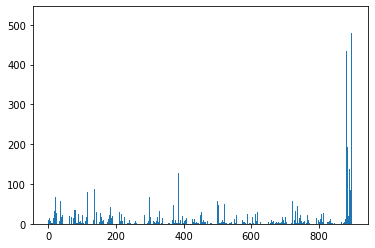

In [ ]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=500)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
df = pd.DataFrame(X_train_fs)
df1 = pd.DataFrame(X_test_fs)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of C
C= [0.1, 1, 10, 100]
# Number of features to consider at every split
kernel = ['rbf', 'poly', 'sigmoid','linear']
# Maximum number of levels in tree
gamma = [1, 0.1, 0.01, 0.001]
# Create the random grid
random_grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma}
print(random_grid)

{'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'gamma': [1, 0.1, 0.01, 0.001]}


In [ ]:
from sklearn import svm
# Use the random grid to search for best hyperparameters
# First create the base model to tune
svm = svm.SVC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = random_grid, n_iter = 20, cv = 10, verbose=2, n_jobs = -1)
# Fit the random search model

In [ ]:
svm_random.fit(X_train, y_train)
print(svm_random.best_score_)
print(svm_random.best_params_)
print(svm_random.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 129.2min


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=1, gamma='auto', probability=True)

#Train the model using the training sets
clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=1, gamma='auto', probability=True)

#Train the model using the training sets
clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8391061452513966


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3707
           1       0.83      0.08      0.14       768

    accuracy                           0.84      4475
   macro avg       0.84      0.54      0.53      4475
weighted avg       0.84      0.84      0.78      4475



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3695,   12],
       [ 708,   60]])

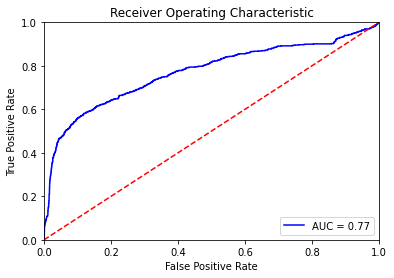

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
clf=svm.SVC(probability=True)

**tuning parameter**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 17899, Test set:4475
Fold:2, Train set: 17899, Test set:4475
Fold:3, Train set: 17899, Test set:4475
Fold:4, Train set: 17899, Test set:4475
Fold:5, Train set: 17900, Test set:4474


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1, gamma='auto')

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=1, gamma='auto', probability=True)

In [ ]:
score = cross_val_score(clf, x_train, y_train, cv= kf, scoring='f1')
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

In [ ]:
score = cross_val_score(clf, x_train, y_train, cv= kf, scoring='accuracy')
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

In [ ]:
score = cross_val_score(clf, x_train, y_train, cv= kf, scoring='precision')
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

In [ ]:
score = cross_val_score(clf, x_train, y_train, cv= kf, scoring='recall')
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')